# Cuadraturas

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm  # para hacer barras de progreso
import sys
sys.path.append('../../tools/interpolacion')  # para que vaya a buscar los módulos

from interp_tools import interp_lagrange  # mi módulo con funciones de cuadraturas

In [57]:
from interp_tools import interp_lagrange
from scipy.interpolate import interp1d

Ejemplo: función
$$
f(x) = sin(3x) + 0.1*(x-2)^2
$$
en el intervalo [1, 3]

El resultado de la integral es:

$$
\int_1^3 f(x)dx = 1/3 (cos(3)-cos(9)+26)
$$

In [58]:
def f(x):
    return np.sin(3*x) - 0.5*(x-2)**2

In [59]:
intf = lambda x: -x**3/6 + x**2 - 2*x - 1/3*np.cos(3*x)
I_analitico = intf(3) - intf(1)
I_analitico

-0.3596207449052562

Tomar una muestra de tamaño Npoints:

In [60]:
Npoints = 4
xd = np.linspace(1, 3, Npoints)
yd = f(xd)

In [61]:
# elegir una partición más densa para graficar
N = 1000
t = np.linspace(xd.min(), xd.max(), N)
y0 = np.repeat(0, N)

Text(0.5, 1.0, 'Integral de la función')

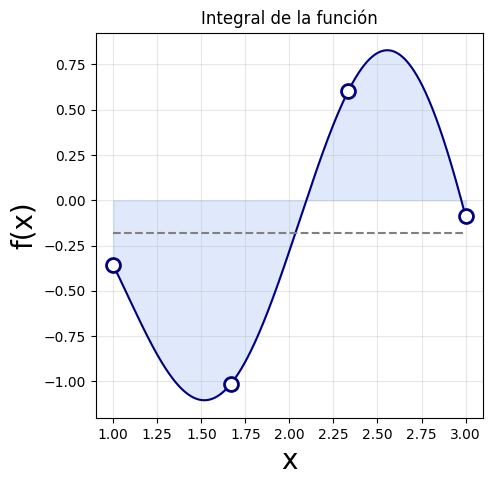

In [62]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

ax.plot(t, f(t), color='navy', linestyle='-')
ax.plot(xd, yd, 'o', mfc='white', mec='navy', markersize=10, mew=2)
#ax.set_ylim(bottom=0)
ax.grid(alpha=0.3)
ax.plot([1, 3], [I_analitico/2, I_analitico/2], linestyle='--', color='grey')
ax.fill_between(t, y0, f(t), color='cornflowerblue', alpha=0.2)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('f(x)', fontsize=20)
ax.set_title('Integral de la función')

## Aproximaciones de la función

In [63]:
# Parecido a la regla del punto medio

f1 = interp1d(xd, yd, kind='nearest')
f2 = interp1d(xd, yd, kind='previous')
f3 = interp1d(xd, yd, kind='next')

In [64]:
# Splines

f4 = interp1d(xd, yd)  # <--- linear (default)
f5 = interp1d(xd, yd, kind='quadratic')
f6 = interp1d(xd, yd, kind='cubic')

In [65]:
# Usando el polinomio interpolante

interp_lagrange??

Signature: interp_lagrange(x, xd, yd)
Docstring: <no docstring>
Source:   
def interp_lagrange(x, xd, yd):
    y = 0
    for k in range(len(yd)):
        y = y + yd[k]*Lk(xd, x, k)
    return y
File:      ~/store/TeachJob/ComputacionProf/computacion_Famaf/tools/interpolacion/interp_tools.py
Type:      function

In [66]:
from functools import partial
f7 = partial(interp_lagrange, xd=xd, yd=yd)

Veamos gráficamente cómo son las aproximaciones

In [67]:
# Color schemes
c1 = '#A07855FF'
c2 = '#D4B996FF'
ce1 = 'k'
ce2 = 'peru'

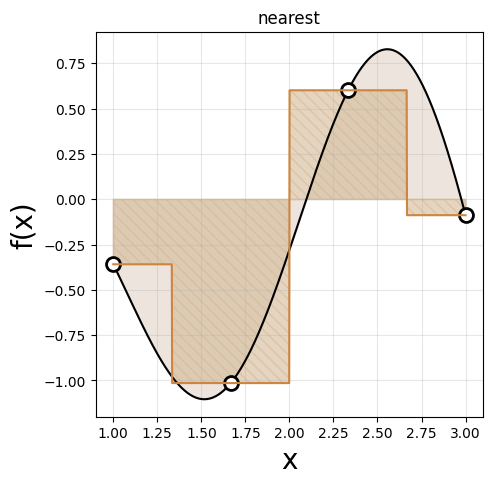

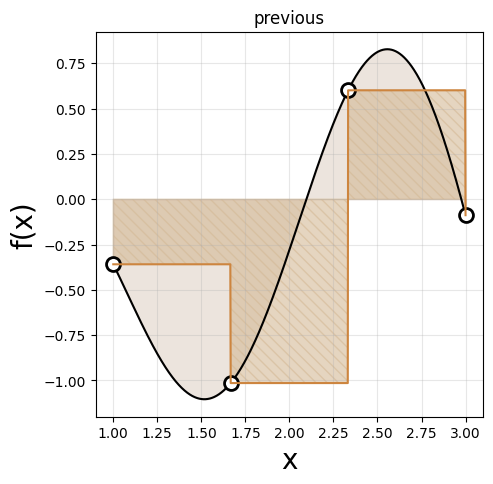

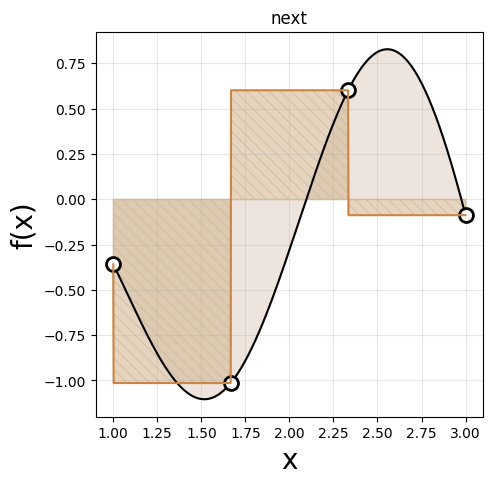

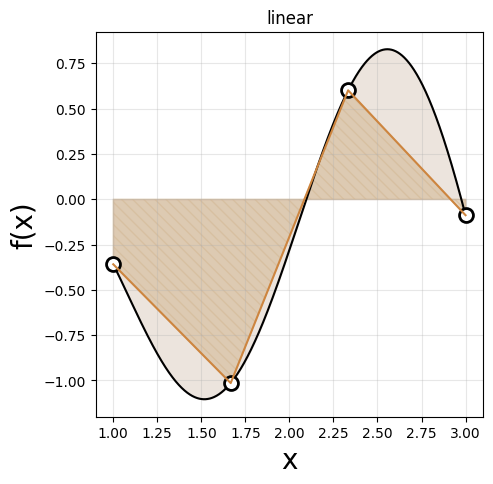

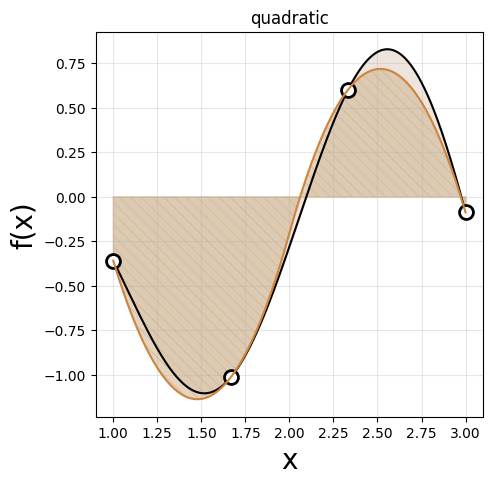

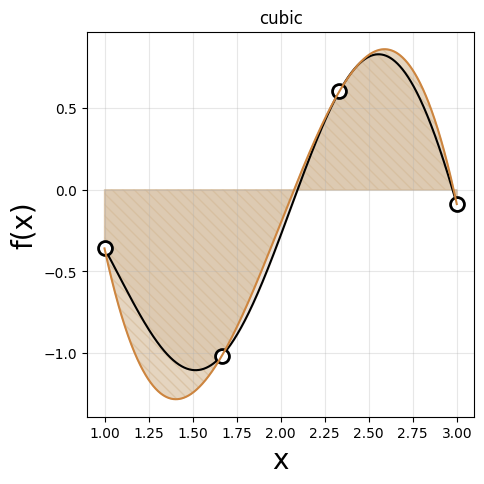

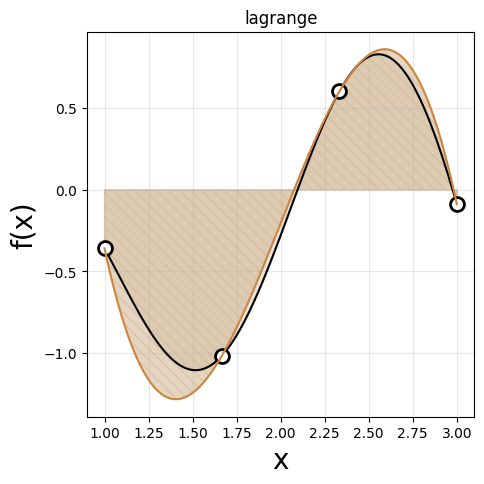

In [68]:
names = ['nearest', 'previous', 'next', 'linear', 'quadratic', 'cubic', 'lagrange']
functions = [f1, f2, f3, f4, f5, f6, f7]
for name, func in zip(names, functions):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()

    ax.plot(t, f(t), color='k', linestyle='-')
    ax.plot(xd, yd, 'o', mfc='white', mec='k', markersize=10, mew=2)
    ax.grid(alpha=0.3)
    ax.fill_between(t, y0, f(t), color=c1, alpha=0.2)

    ax.plot(t, func(t), color=ce2)
    ax.fill_between(t, y0, func(t), hatch='\\\\\\', color=c2, alpha=0.6)

    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('f(x)', fontsize=20)
    ax.set_title(name)

Veamos con más puntos

In [69]:
Npoints = 12
xd = np.linspace(1, 3, Npoints)
yd = f(xd)

In [70]:
f1 = interp1d(xd, yd, kind='nearest')
f2 = interp1d(xd, yd, kind='previous')
f3 = interp1d(xd, yd, kind='next')
f4 = interp1d(xd, yd)  # <--- linear (default)
f5 = interp1d(xd, yd, kind='quadratic')
f6 = interp1d(xd, yd, kind='cubic')
f7 = partial(interp_lagrange, xd=xd, yd=yd)

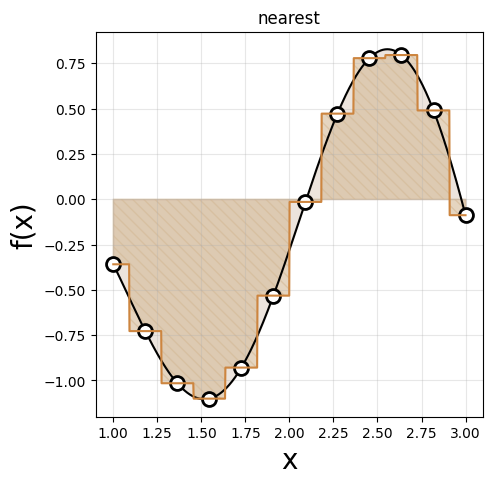

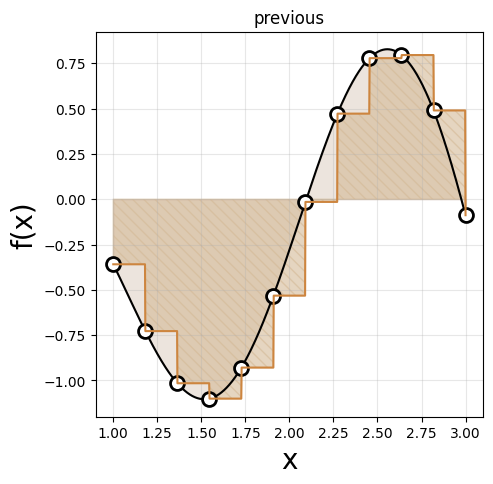

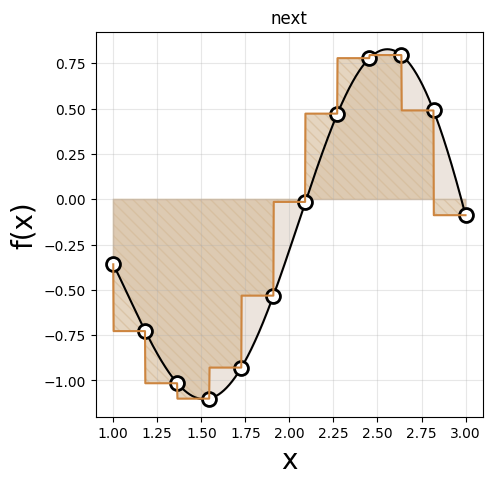

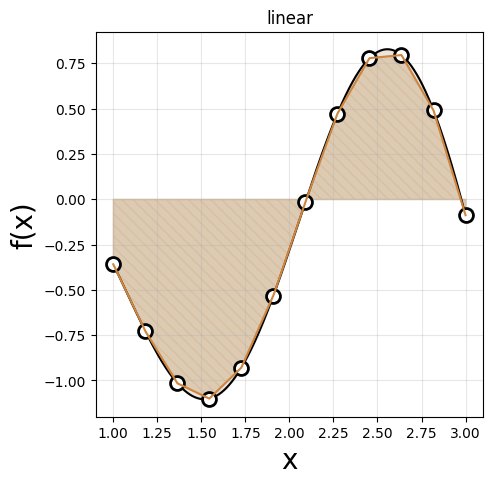

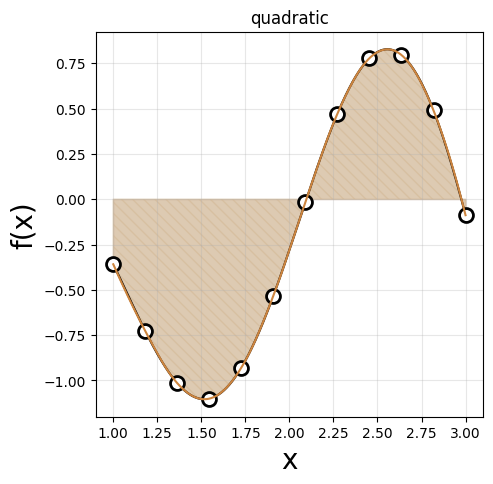

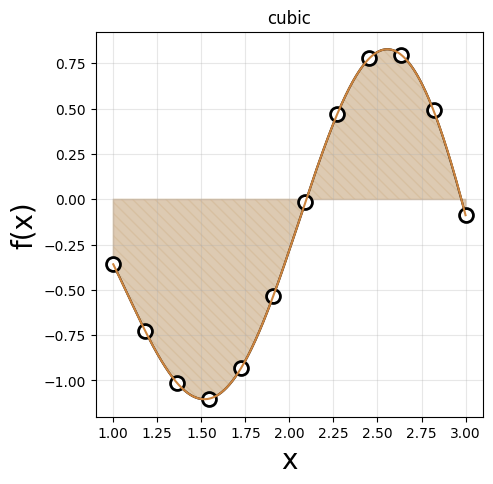

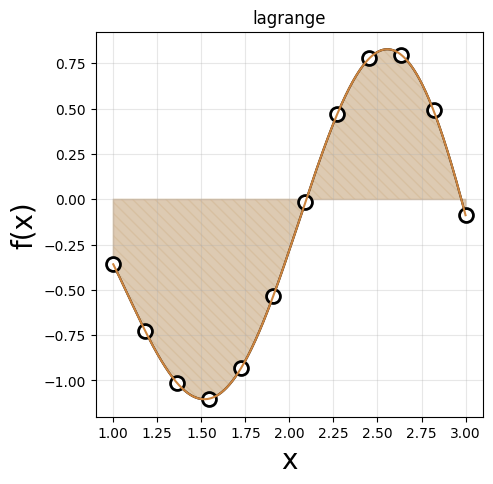

In [71]:
names = ['nearest', 'previous', 'next', 'linear', 'quadratic', 'cubic', 'lagrange']
functions = [f1, f2, f3, f4, f5, f6, f7]
for name, func in zip(names, functions):

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()

    ax.plot(t, f(t), color='k', linestyle='-')
    ax.plot(xd, yd, 'o', mfc='white', mec='k', markersize=10, mew=2)
    ax.grid(alpha=0.3)
    ax.fill_between(t, y0, f(t), color=c1, alpha=0.2)

    ax.plot(t, func(t), color=ce2)
    ax.fill_between(t, y0, func(t), hatch='\\\\\\', color=c2, alpha=0.6)

    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('f(x)', fontsize=20)
    ax.set_title(name)

Vamos a hacer una aproximación del cálculo del área:

In [72]:
names = ['nearest', 'previous', 'next', 'linear', 'quadratic', 'cubic', 'lagrange']
functions = [f1, f2, f3, f4, f5, f6, f7]
dt = t[2]-t[1]
for name, func in zip(names, functions):

    A = (func(t)*dt).sum()
    print(f'{name:12s}:  {A:12.7f}  {I_analitico-A:12.7f}')

nearest     :    -0.3650085     0.0053878
previous    :    -0.3899834     0.0303626
next        :    -0.3397520    -0.0198688
linear      :    -0.3649231     0.0053024
quadratic   :    -0.3602236     0.0006029
cubic       :    -0.3599609     0.0003402
lagrange    :    -0.3600688     0.0004481


### Reglas de cuadratura

En el modulo tenemos dos implementaciones de Simpson compuesta:
- una que toma los datos y la funcion
- una que toma la funcion, el intervalo y la tolerancia

In [73]:
from cuadraturas import cuad_simpson_compuesta, cuad_simpson_compuesta_II

In [74]:
A = cuad_simpson_compuesta(x=xd, f=f)
print(f'{I_analitico}\n{A}\n')

-0.3596207449052562
-0.34399060771363804



In [75]:
A = cuad_simpson_compuesta_II(f=f, I=(1, 3), eps=0.01)
print(f'{I_analitico}\n{A}\n')

-0.3596207449052562
-0.3356507294831927



Veamos como evoluciona el error con la cantidad de puntos

In [76]:
Areas = []
Npoints = range(3, 200)
for npoints in Npoints:
    xd = np.linspace(1, 3, npoints)
    A = cuad_simpson_compuesta(x=xd, f=f)
    Areas.append(A)

Text(0, 0.5, '$\\Delta A$')

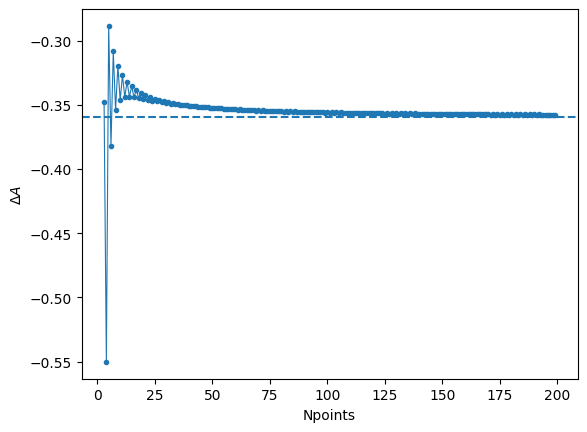

In [77]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Npoints, Areas, s=9)
ax.plot(Npoints, Areas, linewidth=0.8)
ax.axhline(I_analitico, linestyle='--')
ax.set_xlabel('Npoints')
ax.set_ylabel(r'$\Delta A$')

Veamos como evoluciona el error con la tolerancia

In [78]:
Areas = []
EPS = np.logspace(-2, -5, 10)

In [79]:
EPS

array([1.00000000e-02, 4.64158883e-03, 2.15443469e-03, 1.00000000e-03,
       4.64158883e-04, 2.15443469e-04, 1.00000000e-04, 4.64158883e-05,
       2.15443469e-05, 1.00000000e-05])

In [80]:
for eps in tqdm(EPS):
    xd = np.linspace(1, 3, npoints)
    A = cuad_simpson_compuesta_II(f=f, I=(1, 3), eps=eps)
    Areas.append(A)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 329.99it/s]


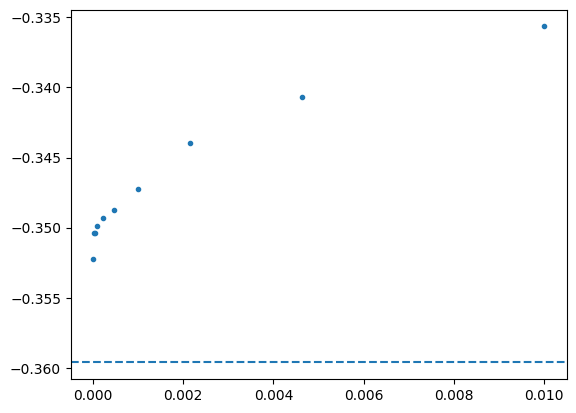

In [81]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(EPS, Areas, s=9)
ax.axhline(I_analitico, linestyle='--')

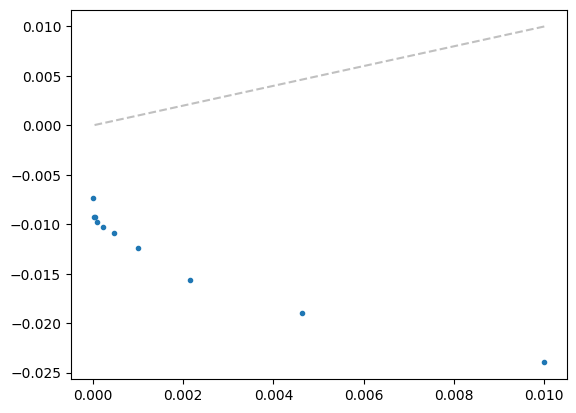

In [82]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(EPS, I_analitico-Areas, s=9)
ax.plot(EPS, EPS, linestyle='--', color='silver')

Ahora veamos con las otras reglas

In [84]:
from cuadraturas import punto_medio_compuesta, trapecio_compuesta

In [93]:
Areas_S, Areas_P, Areas_T = [], [], []
Npoints = range(3, 500)
for npoints in Npoints:
    xd = np.linspace(1, 3, npoints)
    A = cuad_simpson_compuesta(x=xd, f=f)
    Areas_S.append(A)
    A = punto_medio_compuesta(x=xd, f=f)
    Areas_P.append(A)
    A = trapecio_compuesta(x=xd, f=f)
    Areas_T.append(A)

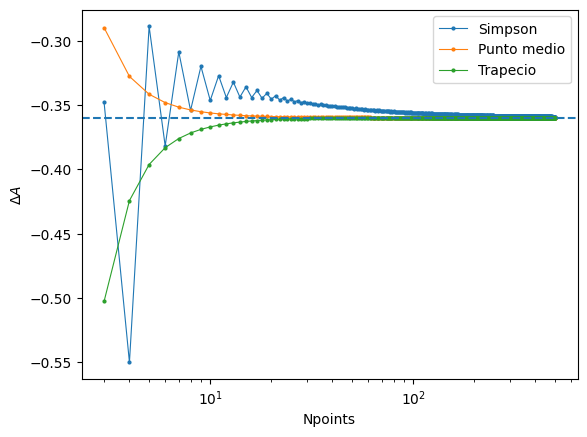

In [100]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(Npoints, Areas_S, linewidth=0.8, marker='o', markersize=2, label='Simpson')

ax.plot(Npoints, Areas_P, linewidth=0.8, marker='o', markersize=2, label='Punto medio')

ax.plot(Npoints, Areas_T, linewidth=0.8, marker='o', markersize=2, label='Trapecio')

ax.axhline(I_analitico, linestyle='--')
ax.legend()
ax.set_xlabel('Npoints')
ax.set_ylabel(r'$\Delta A$')
ax.set_xscale('log')